In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Volumes/Secondary/LSG/ML/medicalCostPrediction/datasets/insurance.csv')

In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

- finding null values

In [6]:
data.isna().sum() #get count of null values of each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation**: No null values found

Dependent variable - charges


Independent variables - age, bmi, children, sex

<AxesSubplot:>

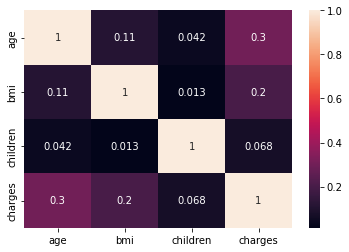

In [7]:
#correlation matrix
sns.heatmap(data.corr(),annot=True) #heatmap to check the relation between dependent variable and independent numerical features

## Finding the relation between dependent and independent features

<AxesSubplot:xlabel='age', ylabel='charges'>

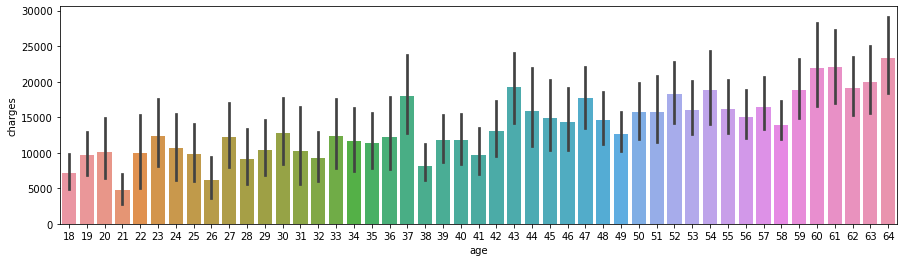

In [8]:
#scatterplot to understand the correlation between categorical and numerical variables
plt.figure(figsize=(15,4))
sns.barplot(data=data, x='age', y='charges')

<AxesSubplot:xlabel='sex', ylabel='charges'>

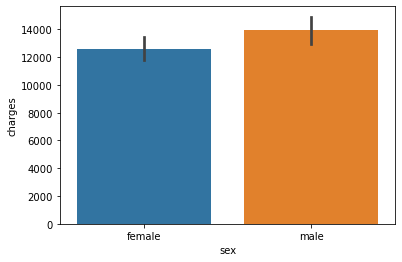

In [9]:
sns.barplot(data=data, x='sex', y='charges')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

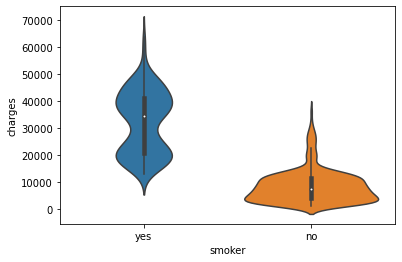

In [10]:
sns.violinplot(data=data, x='smoker', y='charges')

<AxesSubplot:xlabel='children', ylabel='charges'>

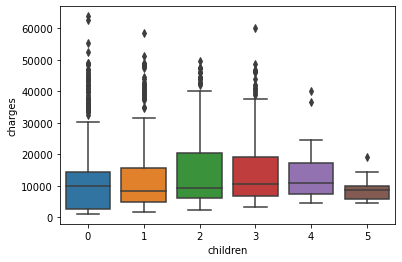

In [11]:
sns.boxplot(data=data, x='children', y='charges')

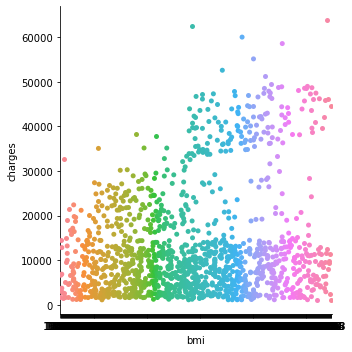

In [12]:
sns.catplot(data=data, x='bmi', y='charges')

<AxesSubplot:xlabel='region', ylabel='charges'>

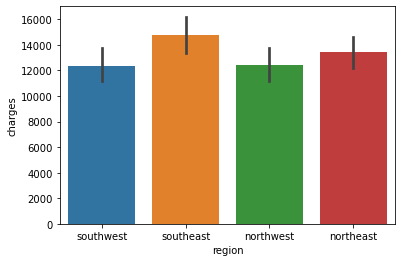

In [13]:
sns.barplot(data=data, x='region', y='charges')

# handling categorical features for linear regresssion
1. Label encoding
2. one hot encoding
- to convert categorical into binary

In [14]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [16]:
df_encode.head(5)

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lin_reg.predict(X_test)

## Knowing model accuracy

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7305284299807451

## Other way of handling categorical features

In [59]:
X= data.iloc[:,:-1].values
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def categorical_feature_conversion(feature, index, array):
    label_encoder  = LabelEncoder()
    feature = label_encoder.fit_transform(feature)
    ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [index])], remainder='passthrough')  
    array = ct.fit_transform(array)
    return array

In [90]:
categorical_feature_conversion(X[:,1],1,X)
X[:,1]

array([0, 1, 1, ..., 0, 0, 0], dtype=object)

In [93]:
categorical_feature_conversion(X[:,4],4,X)
X[:,4]

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [92]:
categorical_feature_conversion(X[:,5],5,X)
X[:,5]

array(['southwest', 'southeast', 'southeast', ..., 'southeast',
       'southwest', 'northwest'], dtype=object)

In [ ]:
pd.to_csv('final_data.csv')